In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [5]:
# Load the data
df = pd.read_csv('employee_data.csv')

df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.describe()
#need for scaling -> number of projects, average monthly hours, time spend company

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
print(df['salary'].value_counts())
print(df['sales'].value_counts())



salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64
sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


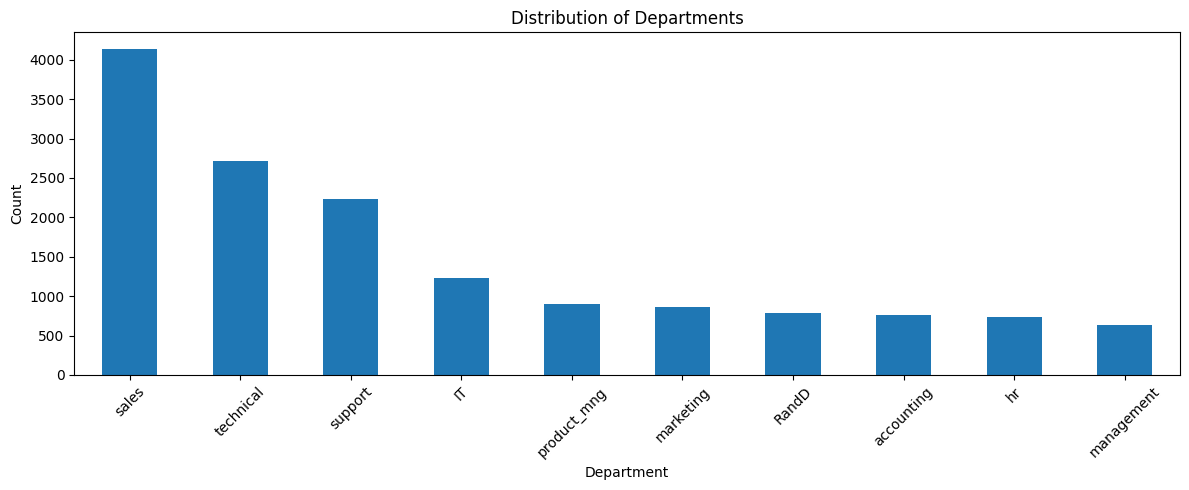

In [8]:
# Visualize the distribution of departments
plt.figure(figsize=(12, 5))
df['sales'].value_counts().plot(kind='bar')
plt.title('Distribution of Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Create a copy of the dataframe
df_model = df.copy()

# 1. Handling 'salary' - Use one-hot encoding since it's ordinal but with few categories
df_model = pd.get_dummies(df_model, columns=['salary'], prefix=['salary'], dtype=int)

# 2. Handling 'sales' department - Use one-hot encoding
df_model = pd.get_dummies(df_model, columns=['sales'], prefix=['department'], dtype=int)

# Check class balance and dimensionality
print("Number of features after encoding:", len(df_model.columns))
print("\nFeature names:")
print(df_model.columns.tolist())

Number of features after encoding: 21

Feature names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium', 'department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical']


In [27]:
df_model.head(5)
df_model.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_high,salary_low,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,0.360611,0.490889,0.187279,0.144610,0.238083,0.021268,0.082472,0.487766,...,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,0.246518,0.233379,0.182517,0.351719,0.425924,0.144281,0.275092,0.499867,...,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,0.200000,0.280374,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,0.400000,0.485981,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,0.600000,0.696262,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
scale = MinMaxScaler()

# Scale only the specified columns
columns_to_scale = ['number_project', 'average_montly_hours', 'time_spend_company']
df_model[columns_to_scale] = scale.fit_transform(df_model[columns_to_scale])

df_model.head(5)
df_model.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_high,salary_low,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,0.360611,0.490889,0.187279,0.144610,0.238083,0.021268,0.082472,0.487766,...,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,0.246518,0.233379,0.182517,0.351719,0.425924,0.144281,0.275092,0.499867,...,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,0.200000,0.280374,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,0.400000,0.485981,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,0.600000,0.696262,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Define the features and target variable

X = df_model.drop(columns='left') 
print(X.count())

y = df_model['left']

satisfaction_level        14999
last_evaluation           14999
number_project            14999
average_montly_hours      14999
time_spend_company        14999
work_accident             14999
promotion_last_5years     14999
salary_high               14999
salary_low                14999
salary_medium             14999
department_IT             14999
department_RandD          14999
department_accounting     14999
department_hr             14999
department_management     14999
department_marketing      14999
department_product_mng    14999
department_sales          14999
department_support        14999
department_technical      14999
dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#model = LogisticRegression()
#model.fit(X_train, y_train)
# Create a dictionary of models to try
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42)
}


In [15]:
#predictions = model.predict(X_test)

#print(classification_report(y_test, predictions))

#print('Accuracy: ', accuracy_score(y_test, predictions))


In [16]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Results for {name}:")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred))
    print('Accuracy: ', accuracy_score(y_test, y_pred))


--------------------------------------------------
Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000

Accuracy:  0.7836666666666666

--------------------------------------------------
Results for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Accuracy:  0.9876666666666667

--------------------------------------------------
Results for Gradient Boosting:
              precision    recall  f1-s

In [17]:
# Add cross-validation to verify results
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [0.999      0.97833333 0.98366667 0.999      0.99533178]
Average CV score: 0.9911 (+/- 0.0170)



Top 10 Most Important Features:
                 feature  importance
0     satisfaction_level    0.306646
2         number_project    0.187816
4     time_spend_company    0.174547
3   average_montly_hours    0.157841
1        last_evaluation    0.125051
5          work_accident    0.010424
8             salary_low    0.007606
7            salary_high    0.004817
17      department_sales    0.003498
19  department_technical    0.003486


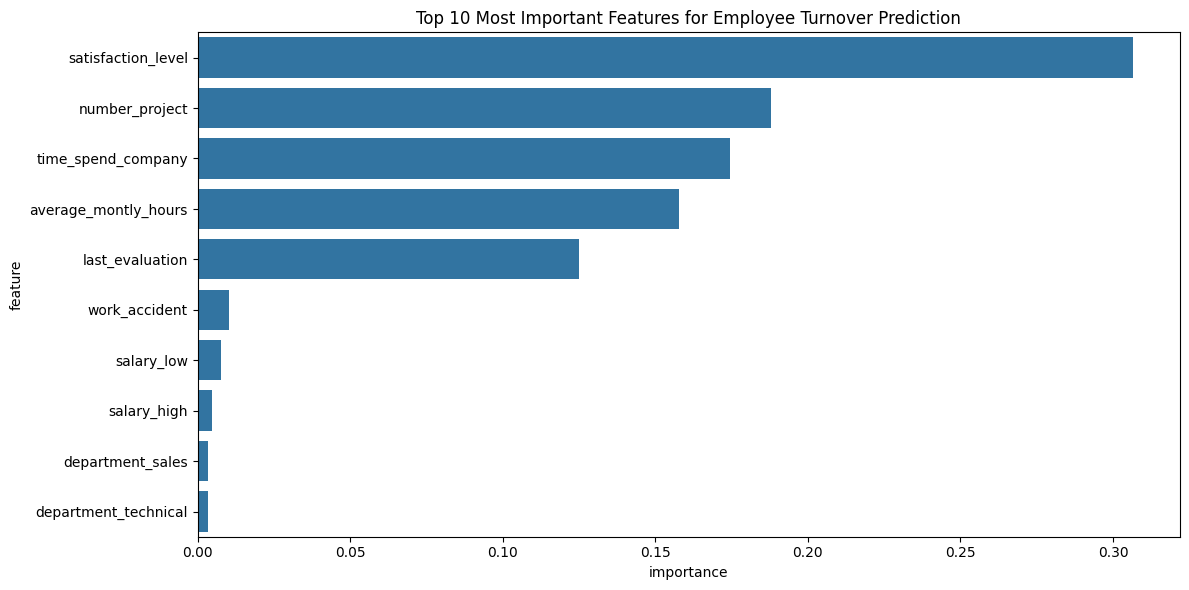

In [18]:
# Let's examine feature importance to understand why the model performs so well
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Display top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Employee Turnover Prediction')
plt.tight_layout()
plt.show()

In [19]:
top_10_features = feature_importance.head(10)
top_10_features

,feature,importance
0,satisfaction_level,0.306646
2,number_project,0.187816
4,time_spend_company,0.174547
3,average_montly_hours,0.157841
1,last_evaluation,0.125051
5,work_accident,0.010424
8,salary_low,0.007606
7,salary_high,0.004817
17,department_sales,0.003498
19,department_technical,0.003486


In [20]:
top_10_list = feature_importance.head(10)['feature'].tolist()
top_10_list


['satisfaction_level',
 'number_project',
 'time_spend_company',
 'average_montly_hours',
 'last_evaluation',
 'work_accident',
 'salary_low',
 'salary_high',
 'department_sales',
 'department_technical']

In [21]:
X_top_10 = X[top_10_list]


In [22]:
X_top_10_train, X_top_10_test, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=42)

In [23]:
rf_model_top10 = RandomForestClassifier(random_state=42)
rf_model_top10.fit(X_top_10_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
predictions_top10 = rf_model_top10.predict(X_top_10_test)
y_prob = rf_model_top10.predict_proba(X_top_10_test)[:, 1]

print(classification_report(y_test, predictions_top10))
print('Accuracy: ', accuracy_score(y_test, predictions_top10))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Accuracy:  0.9886666666666667


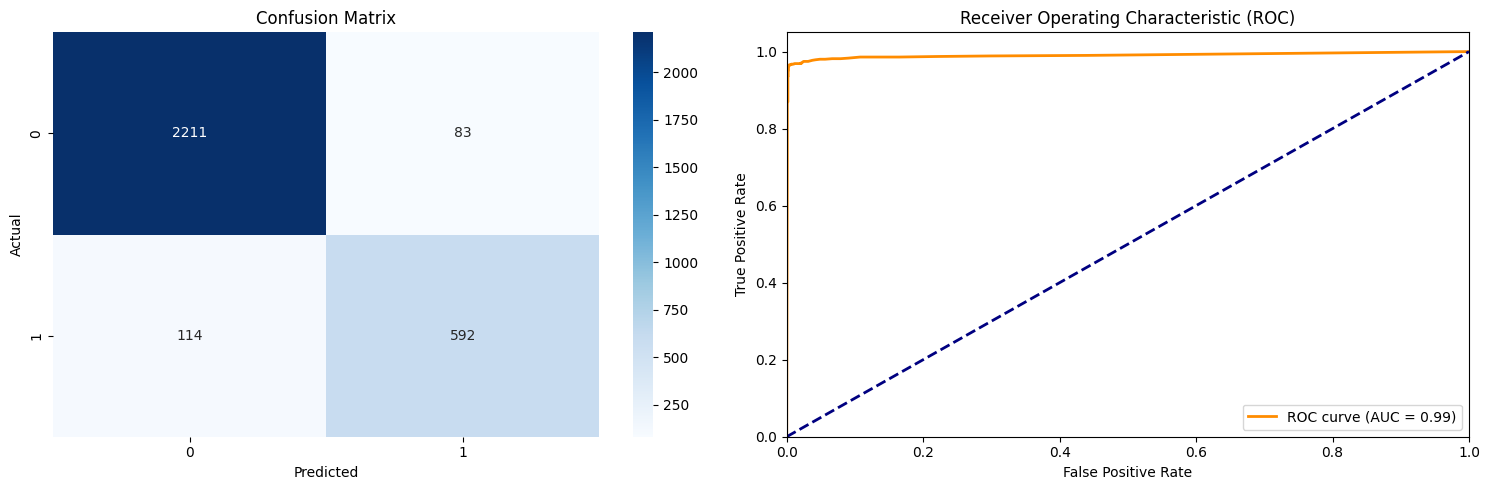

In [25]:
# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC)')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [26]:
# Save the model and scaler
joblib.dump(rf_model_top10, 'random_forest_turnover_top10.joblib')
joblib.dump(scale, 'scaler.joblib')

['scaler.joblib']